## Pre-processing

In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(picante)

#### Create phyloseq object

Non-transformed (for alpha diversity)

In [3]:
setwd("/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/") 

biom <- import_biom("combined_data.biom")
 map <- import_qiime_sample_data("combined_mapfile.txt")
 tree <- read_tree("deblur/aligned/rep_phylo.tre")
 cuttlerun_nt <- merge_phyloseq(biom,tree,map)
 cuttlerun_nt <- prune_samples(sample_sums(cuttlerun_nt) > 1000, cuttlerun_nt) %>%
    filter_taxa(function(x) sum(x > 3) > (0.001*length(x)), TRUE)

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [7]:
biom <- import_biom("combined_data.biom")
 map <- import_qiime_sample_data("combined_mapfile.txt")
 tree <- read_tree("deblur/aligned/rep_phylo.tre")
 cuttlerun <- merge_phyloseq(biom,tree,map) %>%
     prune_samples((sample_sums(.) > 1000), .) %>%
    filter_taxa(function(x) sum(x > 3) > (0.001*length(x)), TRUE) %>%
    transform_sample_counts(function(x) x / sum(x))
    

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [8]:
saveRDS(cuttlerun_nt, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/RDSfiles/cuttlerun_nt.rds")
saveRDS(cuttlerun, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/RDSfiles/cuttlerun.rds")

In [14]:
x = sample_data(cuttlerun_nt)

head(x)
head(x$Source)
head(x$SampleType)
head(x$Experiment)

,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,Tank,CF,SampleDate,Source,Treatment_Period,SampleType,Description
20.9.30,20.9.30,TATTGCAGCAGC,GTGTGYCAGCMGCCGCGGTAA,1,D12,Fecal_1,Test,3,20,9_30,Cuttlefish,Pre-treatment,Fecal,Fecal
7ESO,7ESO,ATGTGGCGTGTT,GTGTGYCAGCMGCCGCGGTAA,10,A7,Tissue_1,Control,2,7,Post_treatment,Cuttlefish,Post-treatment,Esophagus,Tissue
12SKI,12SKI,GTTGTGGGCGCG,GTGTGYCAGCMGCCGCGGTAA,10,H12,Tissue_1,Control,2,12,Post_treatment,Cuttlefish,Post-treatment,Skin,Tissue
9STO,9STO,CTGCCCTCGATG,GTGTGYCAGCMGCCGCGGTAA,10,B9,Tissue_1,Control,2,9,Post_treatment,Cuttlefish,Post-treatment,Stomach,Tissue
19.10.4,19.10.4,AGCTCTAGAAAC,GTGTGYCAGCMGCCGCGGTAA,2,C3,Fecal_2,Test,3,19,10_4,Cuttlefish,Treatment,Fecal,Fecal
20.10.6,20.10.6,CCGGCGACAGAA,GTGTGYCAGCMGCCGCGGTAA,2,D6,Fecal_2,Test,3,20,10_6,Cuttlefish,Treatment,Fecal,Fecal


[1] Cuttlefish Cuttlefish Cuttlefish Cuttlefish Cuttlefish Cuttlefish
Levels: Cuttlefish Negative Shrimp Squid Water

[1] Fecal     Esophagus Skin      Stomach   Fecal     Fecal    
21 Levels: Arm BuccalMass Cecum Digestive_gland Esophagus Fecal ... Water

[1] Test    Control Control Control Test    Test   
Levels: Control Negative Prelim Test

In [9]:
cuttlefish = subset_samples(cuttlerun, Source=="Cuttlefish" )
shrimp = subset_samples(cuttlerun, Source=="Shrimp")
squid = subset_samples(cuttlerun, Source=="Squid")
water = subset_samples(cuttlerun, Source=="Water")
negative = subset_samples(cuttlerun, Source=="Negative")

In [62]:
cuttlefish.00 = prune_taxa(taxa_sums(cuttlefish)>0, cuttlefish)
cuttlefish.csv = otu_table(cuttlefish.00)
write.csv(cuttlefish.csv, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/OTU_tables/cuttlefish.all.otu.csv")

shrimp.00 = prune_taxa(taxa_sums(shrimp)>0, shrimp)
shrimp.csv = otu_table(shrimp.00)
write.csv(shrimp.csv, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/OTU_tables/shrimp.all.otu.csv")

squid.00 = prune_taxa(taxa_sums(squid)>0, squid)
squid.csv = otu_table(squid.00)
write.csv(squid.csv, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/OTU_tables/squid.all.otu.csv")

water.00 = prune_taxa(taxa_sums(water)>0, water)
water.csv = otu_table(water.00)
write.csv(water.csv, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/OTU_tables/water.all.otu.csv")

negative.00 = prune_taxa(taxa_sums(negative)>0, negative)
negative.csv = otu_table(negative.00)
write.csv(negative.csv, "/group/gilbert-lab/Lutz/Cuttlefish/Combined_data_2018/OTU_tables/negative.all.otu.csv")

Transform and filter data (for beta diversity and relative abundance)

### Relative Abundance of ASVs

In [10]:
sample_tab = sample_data(cuttlefish)

In [11]:
prelim = subset_samples(cuttlefish, Experiment=="Prelim")
treatment = subset_samples(cuttlefish, Experiment=="Test")
control = subset_samples(cuttlefish, Experiment=="Control")


In [12]:
control = merge_phyloseq(prelim,control)

fecal_control = subset_samples(control, SampleType=="Fecal")
fecal_treatment = subset_samples(treatment, SampleType=="Fecal")

eso_control = subset_samples(control, SampleType=="Esophagus")
eso_treatment = subset_samples(treatment, SampleType=="Esophagus")

gill_control = subset_samples(control, SampleType=="Gills")
gill_treatment = subset_samples(treatment, SampleType=="Gills")


In [13]:
fecal_control.mdf = psmelt(fecal_control)
fecal_treatment.mdf = psmelt(fecal_treatment)

eso_control.mdf = psmelt(eso_control)
eso_treatment.mdf = psmelt(eso_treatment)

gill_control.mdf = psmelt(gill_control)
gill_treatment.mdf = psmelt(gill_treatment)

In [14]:
fecal = rbind(fecal_control.mdf, fecal_treatment.mdf)

eso = rbind(eso_control.mdf, eso_treatment.mdf)

gill = rbind(gill_control.mdf, gill_treatment.mdf)

In [79]:
prelim.mdf = psmelt(prelim)
treatment.mdf = psmelt(treatment)
control.mdf = psmelt(control)

In [11]:
cuttlefish.mdf = psmelt(cuttlefish)

In [80]:
names(prelim.mdf)[1]<-"OTU"
names(prelim.mdf)[2]<-"Sample"
head(prelim.mdf)

names(treatment.mdf)[1]<-"OTU"
names(treatment.mdf)[2]<-"Sample"
head(treatment.mdf)

names(control.mdf)[1]<-"OTU"
names(control.mdf)[2]<-"Sample"
head(control.mdf)

,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,...,Treatment_Period,SampleType,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
146383,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGCGGTCTGTTAAGCAAGATGTGAAAGCCCGGGGCTCAACCTCGGAACAGCATTTTGAACTGGCAGACTAGAGTCTTGTAGAGGGGGGTAGAATTTCAGG,CF1.Intest.prox,0.9978018,CF1.Intest.prox,AAGGACCGTTTC,GTGTGYCAGCMGCCGCGGTAA,12,D10,CF1,Prelim,...,Prelim,Intestine,CF1.Intest.prox,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Photobacterium,s__
146396,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGCGGTCTGTTAAGCAAGATGTGAAAGCCCGGGGCTCAACCTCGGAACAGCATTTTGAACTGGCAGACTAGAGTCTTGTAGAGGGGGGTAGAATTTCAGG,CF1.Intest.dist,0.9940416,CF1.Intest.dist,GCGTCTCGTCCA,GTGTGYCAGCMGCCGCGGTAA,12,D11,CF1,Prelim,...,Prelim,Intestine,CF1.Intest.dist,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Photobacterium,s__
147170,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,CF3.Esophag,0.9892579,CF3.Esophag,GTGTACATAACG,GTGTGYCAGCMGCCGCGGTAA,12,D3,CF3,Prelim,...,Prelim,Esophagus,CF3.Esophag,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
147175,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,CF2.Esophag,0.9710413,CF2.Esophag,CGGGCACCGGTC,GTGTGYCAGCMGCCGCGGTAA,12,D2,CF2,Prelim,...,Prelim,Esophagus,CF2.Esophag,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
80001,TACGGAGGATTCTAGCGTTATCCGGAATCATTGGGTTTAAAGGGTCCGTAGGCGGAGATTTAAGTCAGGGGTGAAAGTTTATTGCTTAACGATAAAATTGCCTTTGATACTGGATTCCTTGAGTTATTGTGAAGTAGTTAGAATATGTAG,CF1.Tentacle,0.9626603,CF1.Tentacle,GTAGCACTCATG,GTGTGYCAGCMGCCGCGGTAA,12,E10,CF1,Prelim,...,Prelim,Tentacle,CF1.Tentacle,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,NA,NA
79996,TACGGAGGATTCTAGCGTTATCCGGAATCATTGGGTTTAAAGGGTCCGTAGGCGGAGATTTAAGTCAGGGGTGAAAGTTTATTGCTTAACGATAAAATTGCCTTTGATACTGGATTCCTTGAGTTATTGTGAAGTAGTTAGAATATGTAG,CF3.Tentacle,0.8701165,CF3.Tentacle,TTGAATCCTAAT,GTGTGYCAGCMGCCGCGGTAA,12,E11,CF3,Prelim,...,Prelim,Tentacle,CF3.Tentacle,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,NA,NA


,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,...,Treatment_Period,SampleType,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
1407742,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,22ESO,0.9994656,22ESO,ATTACTACACTC,GTGTGYCAGCMGCCGCGGTAA,12,A10,Tissue_2,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
1407956,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,19ESO,0.9974430,19ESO,CGCCGCCAGGTG,GTGTGYCAGCMGCCGCGGTAA,12,A7,Tissue_2,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
1407988,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,1ESO,0.9970588,1ESO,TGTGTTACTCCT,GTGTGYCAGCMGCCGCGGTAA,10,A1,Tissue_1,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
1407799,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,6ESO,0.9949942,6ESO,ACTCGTGATAGC,GTGTGYCAGCMGCCGCGGTAA,10,A6,Tissue_1,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
1407819,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,5ESO,0.9938290,5ESO,ATCTGGACGATC,GTGTGYCAGCMGCCGCGGTAA,10,A5,Tissue_1,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
1407895,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,21ESO,0.9924389,21ESO,ACCGTCTTTCTC,GTGTGYCAGCMGCCGCGGTAA,12,A9,Tissue_2,Test,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis


,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,...,Treatment_Period,SampleType,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
750532,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,14ESO,1.0000000,14ESO,ACGCGTGCCCGG,GTGTGYCAGCMGCCGCGGTAA,12,A2,Tissue_2,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
750566,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,12ESO,0.9998413,12ESO,GATTTAGAGGCT,GTGTGYCAGCMGCCGCGGTAA,10,A12,Tissue_1,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
750502,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,13ESO,0.9997416,13ESO,CCGCCGTAGGGC,GTGTGYCAGCMGCCGCGGTAA,12,A1,Tissue_2,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
750562,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,7ESO,0.9996928,7ESO,ATGTGGCGTGTT,GTGTGYCAGCMGCCGCGGTAA,10,A7,Tissue_1,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
750516,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,11ESO,0.9996513,11ESO,ACCTTCGCGCAC,GTGTGYCAGCMGCCGCGGTAA,10,A11,Tissue_1,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
750503,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,10ESO,0.9995282,10ESO,AGTGAAATACTG,GTGTGYCAGCMGCCGCGGTAA,10,A10,Tissue_1,Control,...,Post-treatment,Esophagus,Tissue,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis


In [85]:
N = 10


topN = prelim.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.prelim = prelim.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,SampleType,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.prelim = mdf.other.prelim %>%
    group_by(Sample,Rank5.other, SampleType) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m


In [75]:
head(mdf.other.prelim)
head(mdf.summary.prelim)

Sample,SampleType,Rank5.other,Abundance
CF1.Caecum,Cecum,f__Bacillaceae,0.002547446
CF1.Caecum,Cecum,f__Flavobacteriaceae,0.034454210
CF1.Caecum,Cecum,f__Microbacteriaceae,0.002356388
CF1.Caecum,Cecum,f__Piscirickettsiaceae,0.000000000
CF1.Caecum,Cecum,f__Pseudomonadaceae,0.002165329
CF1.Caecum,Cecum,f__Vibrionaceae,0.849828047


Sample,Rank5.other,SampleType,avg,sd,sem,proportion
CF1.Intest.prox,f__Vibrionaceae,Intestine,0.9982415,NA,NA,99.82
CF1.Stomach,f__Vibrionaceae,Stomach,0.9981364,NA,NA,99.81
CF1.Esophag,f__Vibrionaceae,Esophagus,0.9953449,NA,NA,99.53
CF1.Intest.dist,f__Vibrionaceae,Intestine,0.9940416,NA,NA,99.40
CF2.Esophag,f__Vibrionaceae,Esophagus,0.9911271,NA,NA,99.11
CF3.Esophag,f__Vibrionaceae,Esophagus,0.9901531,NA,NA,99.02


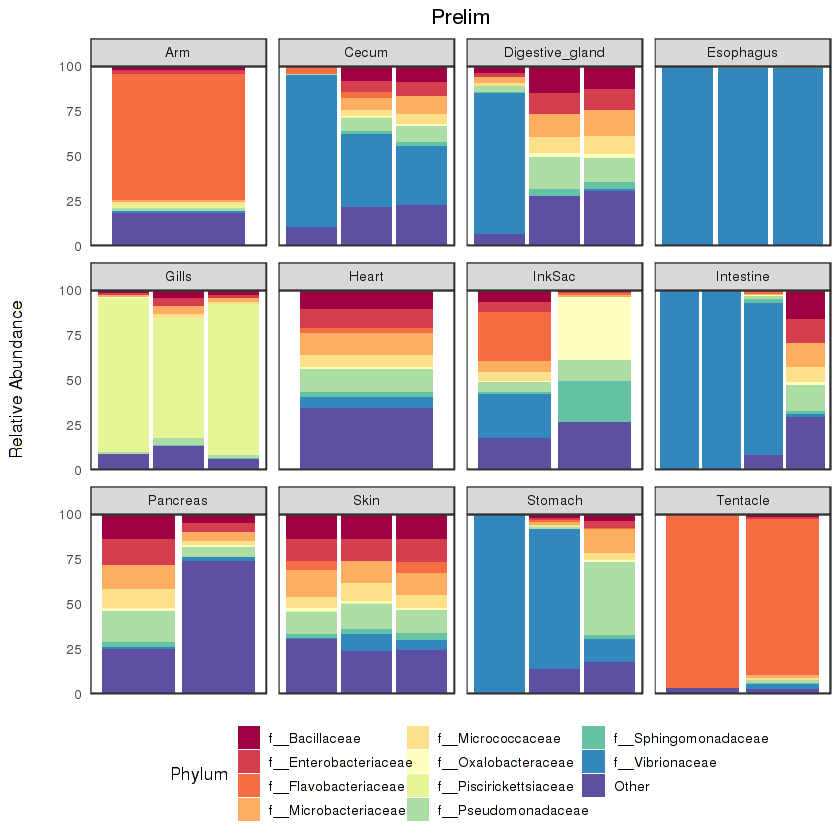

In [86]:
p = ggplot(mdf.summary.prelim, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p = p + facet_wrap(~SampleType, shrink = TRUE, scales = "free_x")

p = p + ylab("Relative Abundance") 

p = p + geom_bar(stat="identity")

p = p + scale_y_continuous(expand = c(0,0))

p = p + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p = p + theme(legend.position="bottom") 

p = p + theme(panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Prelim") + theme(plot.title = element_text(hjust = 0.5))


p

In [83]:
N = 10


topN = control.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.control = control.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,SampleType,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.control = mdf.other.control %>%
    group_by(Sample,Rank5.other, SampleType) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m


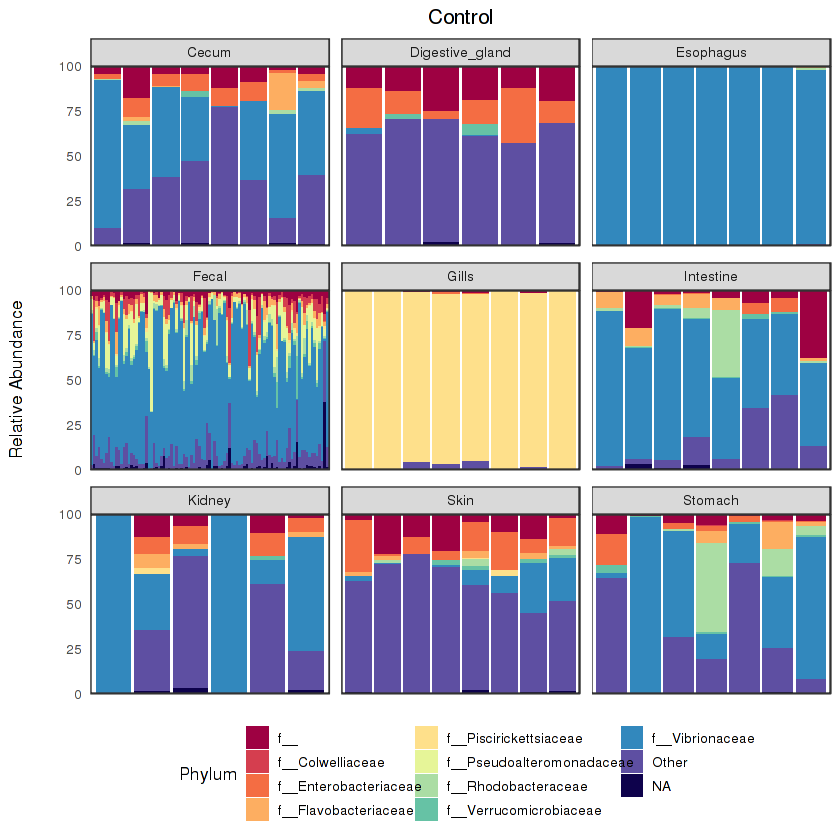

In [84]:
p = ggplot(mdf.summary.control, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p = p + facet_wrap(~SampleType, shrink = TRUE, scales = "free_x")

p = p + ylab("Relative Abundance") 

p = p + geom_bar(stat="identity")

p = p + scale_y_continuous(expand = c(0,0))

p = p + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p = p + theme(legend.position="bottom") 

p = p + theme(panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Control") + theme(plot.title = element_text(hjust = 0.5))


p

In [87]:
N = 10


topN = treatment.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.treatment = treatment.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,SampleType,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.treatment = mdf.other.treatment %>%
    group_by(Sample,Rank5.other, SampleType) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m


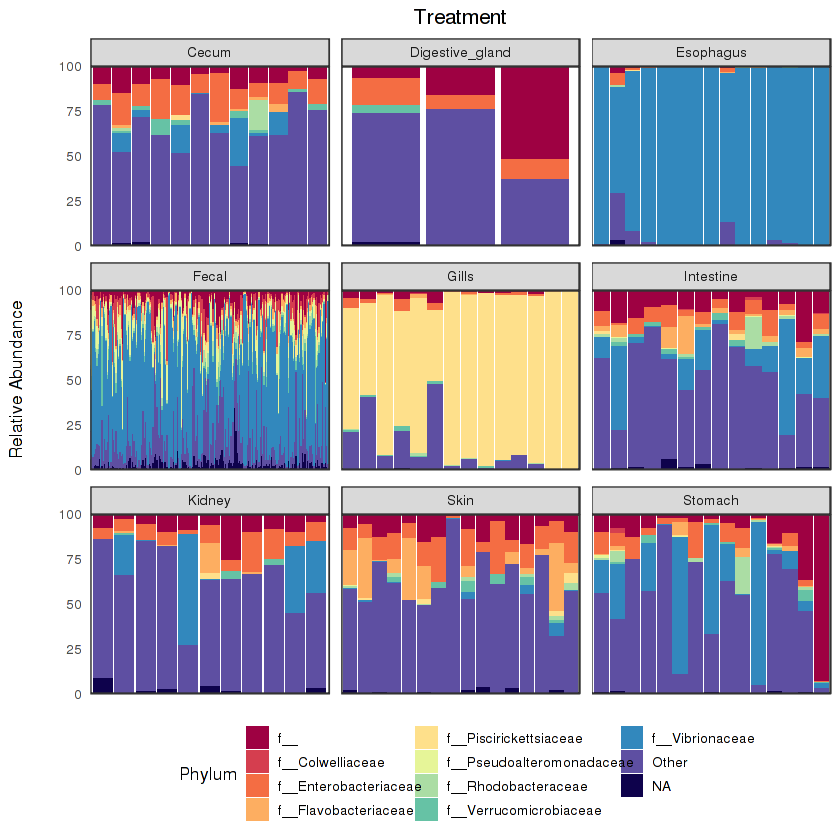

In [88]:
p = ggplot(mdf.summary.treatment, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p = p + facet_wrap(~SampleType, shrink = TRUE, scales = "free_x")

p = p + ylab("Relative Abundance") 

p = p + geom_bar(stat="identity")

p = p + scale_y_continuous(expand = c(0,0))

p = p + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p = p + theme(legend.position="bottom") 

p = p + theme(panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Treatment") + theme(plot.title = element_text(hjust = 0.5))


p

In [113]:
head(fecal_control.mdf)

,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,...,Treatment_Period,SampleType,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
466031,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,7.10.12,0.8554754,7.10.12,GCTGCGTATACC,GTGTGYCAGCMGCCGCGGTAA,3,G1,Fecal_3,Control,...,Treatment2,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
466010,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,12.9.29,0.8293119,12.9.29,CTTAGTGCAGAA,GTGTGYCAGCMGCCGCGGTAA,1,D8,Fecal_1,Control,...,Pre-treatment,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
465984,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,11.9.29,0.7950913,11.9.29,CGGTGACCTACT,GTGTGYCAGCMGCCGCGGTAA,1,C8,Fecal_1,Control,...,Pre-treatment,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
466008,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,14.10.4,0.7683424,14.10.4,ATGTGCTGCTCG,GTGTGYCAGCMGCCGCGGTAA,2,F2,Fecal_2,Control,...,Treatment,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
466022,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,12.10.15,0.7651407,12.10.15,TTCCACACGTGG,GTGTGYCAGCMGCCGCGGTAA,3,D11,Fecal_3,Control,...,Treatment2,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis
466024,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGTAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAAGGTCATTTGAAACTGGCGGGCTAGAGTTTTGTAGAGGGGGGTAGAATTTCAGG,7.10.14,0.7495728,7.10.14,CGAATACTGACA,GTGTGYCAGCMGCCGCGGTAA,3,G7,Fecal_3,Control,...,Treatment2,Fecal,Fecal,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__rumoiensis


In [114]:
N = 10


topN = fecal_control.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.fecal.control = fecal_control.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.fecal.control = mdf.other.fecal.control %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


N = 10


topN = fecal_treatment.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.fecal.treatment = fecal_treatment.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.fecal.treatment = mdf.other.fecal.treatment %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m
Selecting by m


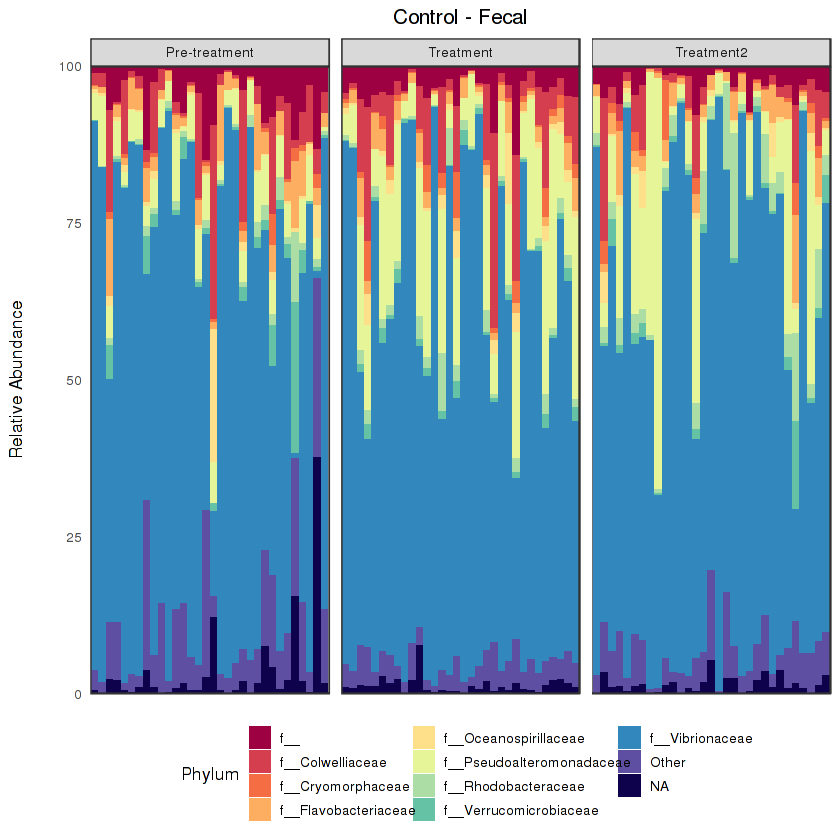

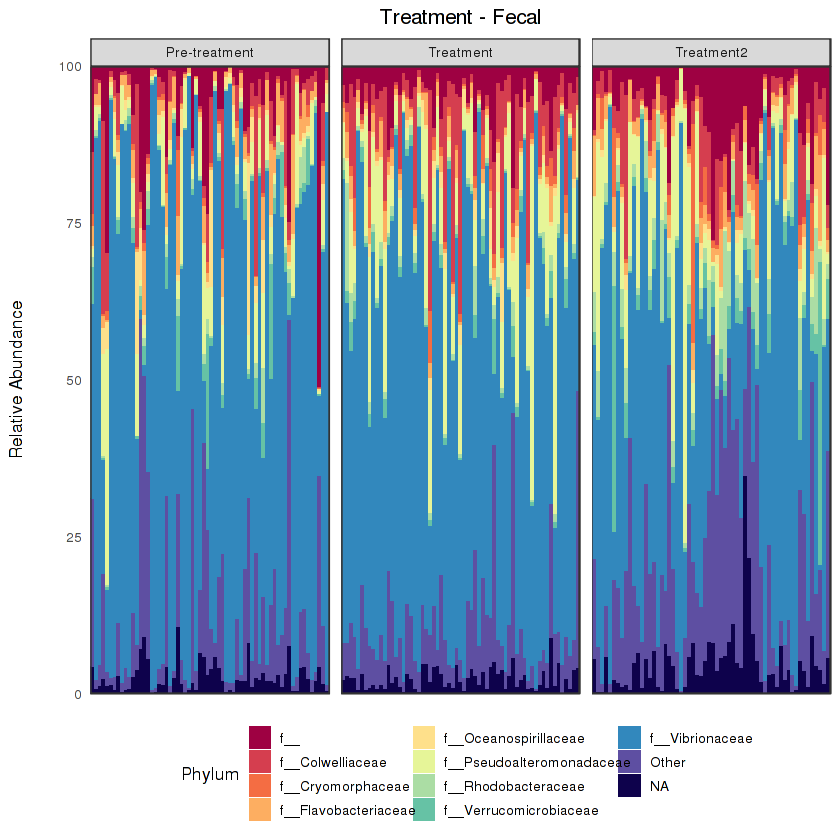

In [127]:
p1 = ggplot(mdf.summary.fecal.control, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p1 = p1 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p1 = p1 + ylab("Relative Abundance") 

p1 = p1 + geom_bar(stat="identity")

p1 = p1 + scale_y_continuous(expand = c(0,0))

p1 = p1 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p1 = p1 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p1 = p1 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p1 = p1 + theme(legend.position="bottom") 

p1 = p1 + theme(panel.spacing = unit(.5, "lines"))

p1 = p1 + ggtitle("Control - Fecal") + theme(plot.title = element_text(hjust = 0.5))


p2 = ggplot(mdf.summary.fecal.treatment, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p2 = p2 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p2 = p2 + ylab("Relative Abundance") 

p2 = p2 + geom_bar(stat="identity")

p2 = p2 + scale_y_continuous(expand = c(0,0))

p2 = p2 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p2 = p2 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p2 = p2 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p2 = p2 + theme(legend.position="bottom") 

p2 = p2 + theme(panel.spacing = unit(.5, "lines"))

p2 = p2 + ggtitle("Treatment - Fecal") + theme(plot.title = element_text(hjust = 0.5))

p1
p2

In [124]:
N = 10


topN = eso_control.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.eso.control = eso_control.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.eso.control = mdf.other.eso.control %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


N = 10


topN = eso_treatment.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.eso.treatment = eso_treatment.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.eso.treatment = mdf.other.eso.treatment %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m
Selecting by m


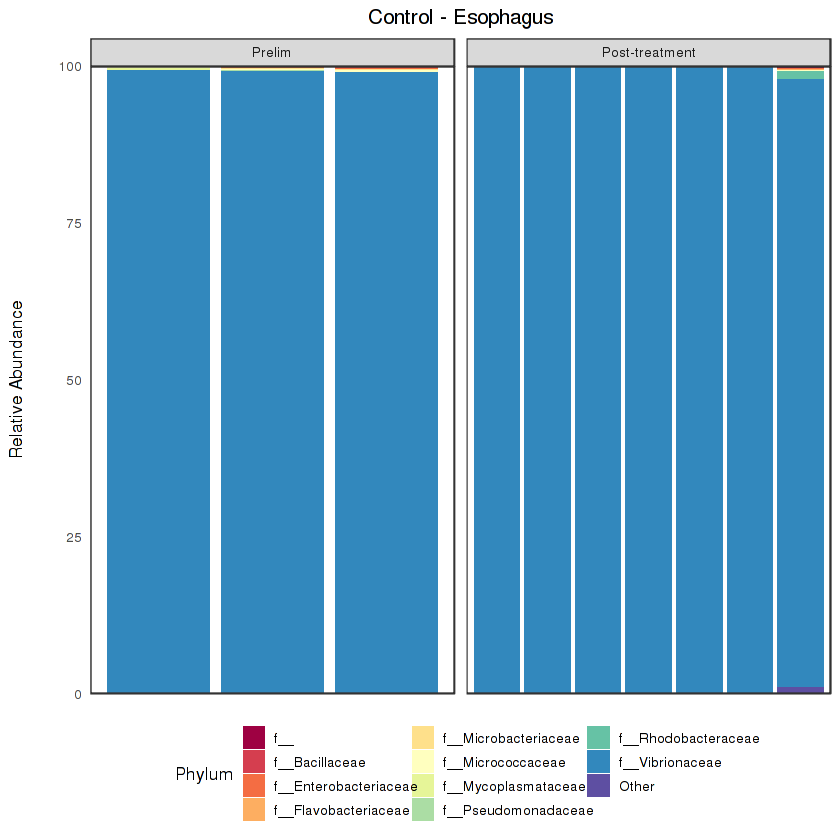

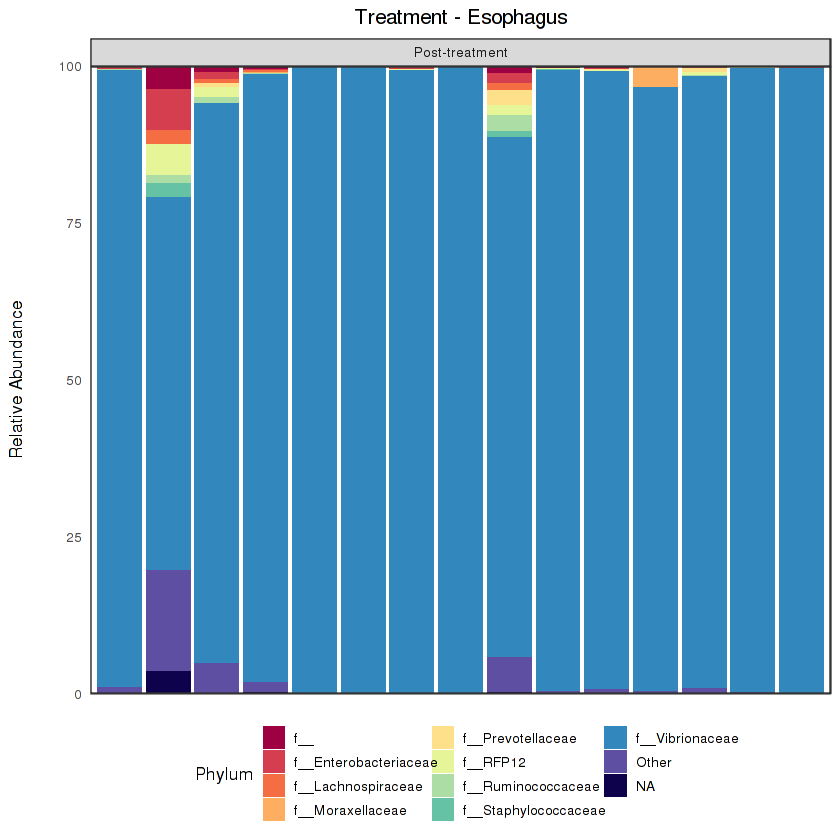

In [128]:
p1 = ggplot(mdf.summary.eso.control, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p1 = p1 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p1 = p1 + ylab("Relative Abundance") 

p1 = p1 + geom_bar(stat="identity")

p1 = p1 + scale_y_continuous(expand = c(0,0))

p1 = p1 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p1 = p1 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p1 = p1 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p1 = p1 + theme(legend.position="bottom") 

p1 = p1 + theme(panel.spacing = unit(.5, "lines"))

p1 = p1 + ggtitle("Control - Esophagus") + theme(plot.title = element_text(hjust = 0.5))



p2 = ggplot(mdf.summary.eso.treatment, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p2 = p2 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p2 = p2 + ylab("Relative Abundance") 

p2 = p2 + geom_bar(stat="identity")

p2 = p2 + scale_y_continuous(expand = c(0,0))

p2 = p2 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p2 = p2 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p2 = p2 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p2 = p2 + theme(legend.position="bottom") 

p2 = p2 + theme(panel.spacing = unit(.5, "lines"))

p2 = p2 + ggtitle("Treatment - Esophagus") + theme(plot.title = element_text(hjust = 0.5))

p1
p2

In [129]:
N = 10


topN = gill_control.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.gill.control = gill_control.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.gill.control = mdf.other.gill.control %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


N = 10


topN = gill_treatment.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.gill.treatment = gill_treatment.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Experiment,Sample,Treatment_Period,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.gill.treatment = mdf.other.gill.treatment %>%
    group_by(Experiment,Sample,Rank5.other, Treatment_Period) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))


Selecting by m
Selecting by m


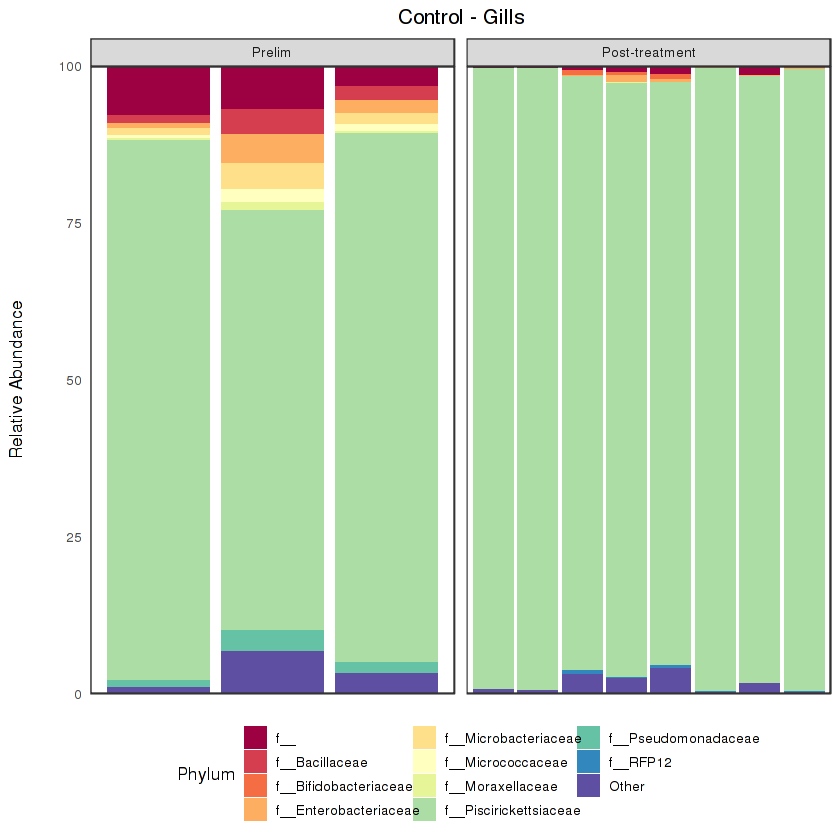

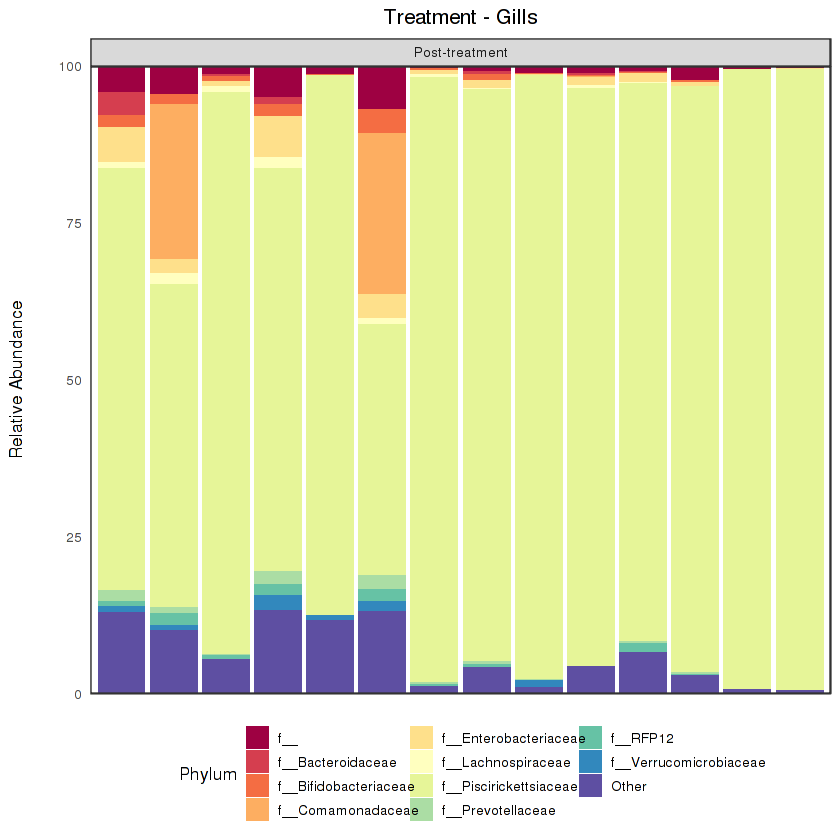

In [130]:
p1 = ggplot(mdf.summary.gill.control, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p1 = p1 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p1 = p1 + ylab("Relative Abundance") 

p1 = p1 + geom_bar(stat="identity")

p1 = p1 + scale_y_continuous(expand = c(0,0))

p1 = p1 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p1 = p1 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p1 = p1 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p1 = p1 + theme(legend.position="bottom") 

p1 = p1 + theme(panel.spacing = unit(.5, "lines"))

p1 = p1 + ggtitle("Control - Gills") + theme(plot.title = element_text(hjust = 0.5))



p2 = ggplot(mdf.summary.gill.treatment, aes(x=Sample, y = proportion, fill = Rank5.other))
                        
p2 = p2 + facet_wrap(~Treatment_Period, shrink = TRUE, scales = "free_x", as.table = TRUE)

p2 = p2 + ylab("Relative Abundance") 

p2 = p2 + geom_bar(stat="identity")

p2 = p2 + scale_y_continuous(expand = c(0,0))

p2 = p2 + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p2 = p2 + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p2 = p2 + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              axis.title.x=element_blank())
              

p2 = p2 + theme(legend.position="bottom") 

p2 = p2 + theme(panel.spacing = unit(.5, "lines"))

p2 = p2 + ggtitle("Treatment - Gills") + theme(plot.title = element_text(hjust = 0.5))

p1
p2

### Subset by SampleType and Host

In [67]:
Fecal_PreRX = subset_samples(Fecal_nt, Treatment_Period=="Pre-treatment")
Fecal_RX1 = subset_samples(Fecal_nt, Treatment_Period=="Treatment")
Fecal_RX2 = subset_samples(Fecal_nt, Treatment_Period=="Treatment2")
Fecal_PostRX = merge_phyloseq(Fecal_RX1, Fecal_RX2)

saveRDS(Fecal_PreRX, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_PreRX_nt.rds")
saveRDS(Fecal_RX1, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_RX1_nt.rds")
saveRDS(Fecal_RX2, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_RX2_nt.rds")
saveRDS(Fecal_PostRX, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_PostRX_nt.rds")

In [68]:
#not transformed

Cecum_nt <- subset_samples(cuttlerun_nt, SampleType=="Cecum")
Digestive_gland_nt <- subset_samples(cuttlerun_nt, SampleType=="Digestive_gland")
Esophagus_nt <- subset_samples(cuttlerun_nt, SampleType=="Esophagus")
Gills_nt <- subset_samples(cuttlerun_nt, SampleType=="Gill")
Kidney_nt <- subset_samples(cuttlerun_nt, SampleType=="Kidney")
Intestine_nt <- subset_samples(cuttlerun_nt, SampleType=="Intestine")
Skin_nt <- subset_samples(cuttlerun_nt, SampleType=="Skin")
Stomach_nt <- subset_samples(cuttlerun_nt, SampleType=="Stomach")
Water_nt <- subset_samples(cuttlerun_nt, SampleType=="Water")
Shrimp_nt <- subset_samples(cuttlerun_nt, SampleType=="Shrimp")
Fecal_nt <- subset_samples(cuttlerun_nt, SampleType=="Fecal")

#transformed

Cecum <- subset_samples(cuttlerun, SampleType=="Cecum")
Digestive_gland <- subset_samples(cuttlerun, SampleType=="Digestive_gland")
Esophagus <- subset_samples(cuttlerun, SampleType=="Esophagus")
Gills <- subset_samples(cuttlerun, SampleType=="Gill")
Kidney <- subset_samples(cuttlerun, SampleType=="Kidney")
Intestine <- subset_samples(cuttlerun, SampleType=="Intestine")
Skin <- subset_samples(cuttlerun, SampleType=="Skin")
Stomach <- subset_samples(cuttlerun, SampleType=="Stomach")
Water <- subset_samples(cuttlerun, SampleType=="Water")
Shrimp <- subset_samples(cuttlerun, SampleType=="Shrimp")
Fecal <- subset_samples(cuttlerun, SampleType=="Fecal")


In [69]:
#save files, saveRDS(ps, file="ps_nt.rds_nt.rds")

#Anatomical Dissections
saveRDS(Cecum_nt , file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Cecum_nt.rds")
saveRDS(Digestive_gland_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Digestive_gland_nt.rds")
saveRDS(Esophagus_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Esophagus_nt.rds")
saveRDS(Gills_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Gill_nt.rds")
saveRDS(Kidney_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Kidney_nt.rds")
saveRDS(Intestine_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Intestine_nt.rds")
saveRDS(Skin_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Skin_nt.rds")
saveRDS(Stomach_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Stomach_nt.rds")

#Experimental Controls
saveRDS(Water_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Water_nt.rds")
saveRDS(Shrimp_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Shrimp_nt.rds")
saveRDS(Fecal_nt, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Fecal_nt.rds")

#save files, saveRDS(ps, file="ps.rds.rds")

#Anatomical Dissections
saveRDS(Cecum , file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Cecum.rds")
saveRDS(Digestive_gland, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Digestive_gland.rds")
saveRDS(Esophagus, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Esophagus.rds")
saveRDS(Gills, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Gill.rds")
saveRDS(Kidney, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Kidney.rds")
saveRDS(Intestine, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Intestine.rds")
saveRDS(Skin, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Skin.rds")
saveRDS(Stomach, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Stomach.rds")

#Experimental Controls
saveRDS(Water, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Water.rds")
saveRDS(Shrimp, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Shrimp.rds")
saveRDS(Fecal, file="/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Fecal.rds")

In [4]:
diss_nt = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/dissections_nt.rds")

control_diss_nt = subset_samples(diss_nt, Group=="Control")
saveRDS(control_diss_nt, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/control_diss_nt.rds")

treatment_diss_nt = subset_samples(diss_nt, Group=="Treatment")
saveRDS(treatment_diss_nt, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/treatment_diss_nt.rds")

Subset by Treatment Period

## Summarize sequencing depths, in general and by category

In [131]:
sample_data(cuttlerun_nt)

,X.SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,Experiment,Tank,CF,SampleDate,Source,Treatment_Period,SampleType,Description
20.9.30,20.9.30,TATTGCAGCAGC,GTGTGYCAGCMGCCGCGGTAA,1,D12,Fecal_1,Test,3,20,9_30,Cuttlefish,Pre-treatment,Fecal,Fecal
7ESO,7ESO,ATGTGGCGTGTT,GTGTGYCAGCMGCCGCGGTAA,10,A7,Tissue_1,Control,2,7,Post_treatment,Cuttlefish,Post-treatment,Esophagus,Tissue
12SKI,12SKI,GTTGTGGGCGCG,GTGTGYCAGCMGCCGCGGTAA,10,H12,Tissue_1,Control,2,12,Post_treatment,Cuttlefish,Post-treatment,Skin,Tissue
9STO,9STO,CTGCCCTCGATG,GTGTGYCAGCMGCCGCGGTAA,10,B9,Tissue_1,Control,2,9,Post_treatment,Cuttlefish,Post-treatment,Stomach,Tissue
19.10.4,19.10.4,AGCTCTAGAAAC,GTGTGYCAGCMGCCGCGGTAA,2,C3,Fecal_2,Test,3,19,10_4,Cuttlefish,Treatment,Fecal,Fecal
20.10.6,20.10.6,CCGGCGACAGAA,GTGTGYCAGCMGCCGCGGTAA,2,D6,Fecal_2,Test,3,20,10_6,Cuttlefish,Treatment,Fecal,Fecal
18.10.4,18.10.4,CCTTGACCGATG,GTGTGYCAGCMGCCGCGGTAA,2,B3,Fecal_2,Test,3,18,10_4,Cuttlefish,Treatment,Fecal,Fecal
5.9.28,5.9.28,CTCGCCCTCGCC,GTGTGYCAGCMGCCGCGGTAA,1,E4,Fecal_1,Test,1,5,9_28,Cuttlefish,Pre-treatment,Fecal,Fecal
10SKI,10SKI,ATCTTGGAGTCG,GTGTGYCAGCMGCCGCGGTAA,10,H10,Tissue_1,Control,2,10,Post_treatment,Cuttlefish,Post-treatment,Skin,Tissue
15CEC,15CEC,CGGTTCACATAG,GTGTGYCAGCMGCCGCGGTAA,12,C3,Tissue_2,Test,3,15,Post_treatment,Cuttlefish,Post-treatment,Cecum,Tissue


In [33]:
head(cuttlerun_sdt)

SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,SamplePlate,SampleWell,Group,Tank,CF,SampleDate,Treatment_Period,SampleType,Description,TotalReads
20.9.30,TATTGCAGCAGC,GTGTGYCAGCMGCCGCGGTAA,1,D12,Fecal_1,D12,Treatment,3,20,9_30,Pre-treatment,Fecal,Fecal,6754
7ESO,ATGTGGCGTGTT,GTGTGYCAGCMGCCGCGGTAA,10,A7,Tissue_1,A7,Control,2,7,Post_treatment,Post-treatment,Esophagus,Tissue,6511
12SKI,GTTGTGGGCGCG,GTGTGYCAGCMGCCGCGGTAA,10,H12,Tissue_1,H12,Control,2,12,Post_treatment,Post-treatment,Skin,Tissue,1665
9STO,CTGCCCTCGATG,GTGTGYCAGCMGCCGCGGTAA,10,B9,Tissue_1,B9,Control,2,9,Post_treatment,Post-treatment,Stomach,Tissue,2451
19.10.4,AGCTCTAGAAAC,GTGTGYCAGCMGCCGCGGTAA,2,C3,Fecal_2,C3,Treatment,3,19,10_4,Treatment,Fecal,Fecal,9735
20.10.6,CCGGCGACAGAA,GTGTGYCAGCMGCCGCGGTAA,2,D6,Fecal_2,D6,Treatment,3,20,10_6,Treatment,Fecal,Fecal,9362


In [41]:
cuttlerun.summary = cuttlerun_sdt %>%
    group_by(SampleType) %>%
summarise(avg = mean(TotalReads), 
              sd = sd(TotalReads), 
              sem = sd/sqrt(length(TotalReads))) %>%
              #proportion = round(avg*100,2)) %>%
    arrange((SampleType))
cuttlerun.summary

SampleType,avg,sd,sem
Cecum,3131.800,1449.5043,324.1190
Digestive_gland,2383.444,515.0973,171.6991
Esophagus,10469.136,3842.3355,819.1887
Fecal,8903.869,2194.6079,130.6870
Gill,9702.818,3827.0614,815.9322
Intestine,5309.636,4118.5131,878.0699
Kidney,3289.824,4236.8635,1027.5903
Shrimp,8374.429,2338.9162,884.0272
Skin,3248.500,2036.6337,415.7261
Stomach,4077.909,2887.5523,615.6282
